# Can you help reduce employee turnover?

## 📖 Background
You work for the human capital department of a large corporation. The Board is worried about the relatively high turnover, and your team must look into ways to reduce the number of employees leaving the company.

The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with your ideas on how to attack the problem.

## 💾 The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

In [1]:
import pandas as pd
df = pd.read_csv('./data/employee_churn_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


## 💪 Competition challenge

Create a report that covers the following:
1. Which department has the highest employee turnover? Which one has the lowest?
2. Investigate which variables seem to be better predictors of employee departure.
3. What recommendations would you make regarding ways to reduce employee turnover?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score,  # I added in F1 score
from sklearn.ensemble import RandomForestClassifier


In [3]:
# settings to display all columns
pd.set_option("display.max_columns", None)

In [4]:
df.sample(5)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
6181,retail,0,0.546166,3,low,7.0,0.391239,0,186.630537,no
3894,sales,0,0.715041,3,high,7.0,0.282555,0,185.384789,yes
6413,retail,0,0.508088,3,medium,9.0,0.511084,1,191.683165,no
8625,sales,0,0.435581,3,medium,7.0,0.715550,0,185.617158,yes
1315,sales,0,0.733536,3,medium,5.0,0.585002,0,178.580570,no


In [5]:
df.shape

(9540, 10)

## Converting the target to numerical: 0 if No and 1 if Yes they left the company

## 0 == NO (Negative) 1 == YES (Positive)

## I should always do it like this as it makes interpretation of the Confustion Matrix
## easy 

In [6]:
False == 0

True

In [7]:
True == 1

True

#### Using apply() or map():
https://towardsdatascience.com/apply-function-to-columns-in-pandas-60b01c41c485

#### Lambda function:

https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/

In [8]:
df['left'] = df['left'].map(lambda x: 0 if x == 'no' else 1 )
# df['category']=df['age'].apply(lambda x: 'Adult' if x>=18 else 'Child') # I think this is using list comprehension

In [9]:
df.sample(5)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
7312,finance,0,0.609522,3,medium,9.0,0.511614,0,190.539498,0
6721,finance,1,0.634358,3,medium,9.0,0.517236,0,192.424167,0
7382,retail,0,0.584867,4,medium,5.0,0.307826,0,181.230315,0
329,retail,0,0.491938,3,high,6.0,0.732553,0,183.085605,0
2946,logistics,0,0.667150,3,medium,4.0,0.723047,1,178.041135,0


## Split the data into testing and training

In [10]:
X = df.drop(columns=['left'])
y = df[['left']]

df.head(3)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,0
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,0
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,0


In [11]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55) # 80% training and 20% test

## Performing EDA

In [12]:
y_train['left'].value_counts()

0    5373
1    2259
Name: left, dtype: int64

<AxesSubplot:xlabel='left'>

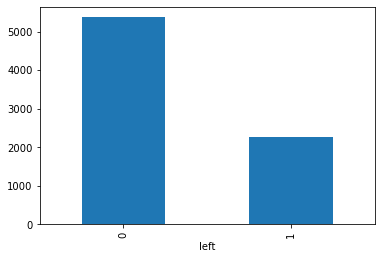

In [13]:
y_train.groupby("left")['left'].count().plot.bar()

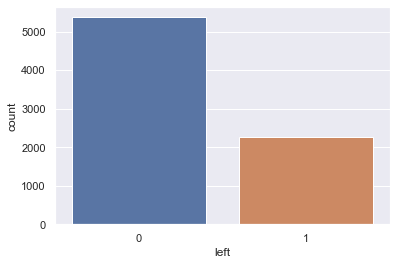

In [14]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="left", data=y_train)

I got count plot from:https://www.kaggle.com/jchen2186/data-visualization-with-python-seaborn

https://seaborn.pydata.org/generated/seaborn.countplot.html

#### From this we can see that the data is imbalanced towards there being less people leaving the company as expected.

In [15]:
X_train.head(3)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month
6870,retail,0,0.698283,3,medium,10.0,0.561656,0,195.494929
8889,operations,0,0.487040,3,medium,7.0,0.730389,0,185.707273
7058,marketing,0,0.572762,3,medium,8.0,0.351720,0,189.038025


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7632 entries, 6870 to 4762
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     7632 non-null   object 
 1   promoted       7632 non-null   int64  
 2   review         7632 non-null   float64
 3   projects       7632 non-null   int64  
 4   salary         7632 non-null   object 
 5   tenure         7632 non-null   float64
 6   satisfaction   7632 non-null   float64
 7   bonus          7632 non-null   int64  
 8   avg_hrs_month  7632 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 596.2+ KB


In [17]:
X_train.dtypes

department        object
promoted           int64
review           float64
projects           int64
salary            object
tenure           float64
satisfaction     float64
bonus              int64
avg_hrs_month    float64
dtype: object

In [18]:
X_train.isnull().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
dtype: int64

#### '''From this we can see that there are no missing values, hence we don't have to impute for missing values.'''

In [19]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
promoted,7632.0,0.029481,0.169162,0.00000,0.000000,0.000000,0.000000,1.000000
review,7632.0,0.652755,0.084937,0.31000,0.593765,0.648798,0.708902,1.000000
projects,7632.0,3.278171,0.577211,2.00000,3.000000,3.000000,4.000000,5.000000
tenure,7632.0,6.563024,1.423251,2.00000,5.000000,7.000000,8.000000,12.000000
satisfaction,7632.0,0.504724,0.158068,0.00000,0.387867,0.500664,0.622412,0.985067
bonus,7632.0,0.212002,0.408753,0.00000,0.000000,0.000000,0.000000,1.000000
avg_hrs_month,7632.0,184.684103,4.169327,171.37406,181.498773,184.662973,187.749006,200.861656


####  so we see here that Categorical variables ['promoted', 'bonus'] are already numerical so I won't have to convert it into dummies later.

#### ['department', 'salary'] are categorical and would have to be converted into dummies

#### ['review', 'satisfaction'] are already between 0 and 1 so I won't have to normalise these.

#### ['projects', 'tenure', 'avg_hrs_month'] would have to be normalised

#### Understanding Boxplots:
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51#:~:text=A%20boxplot%20is%20a%20standardized,and%20what%20their%20values%20are.

#### Drawing a boxplot:
From this link: https://pythonbasics.org/seaborn-boxplot/ I realised I could just use 'x' or 'y' as the argument = feature to 
orient it either horizontal or vertical

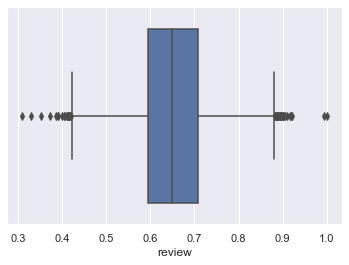

In [20]:
sns.boxplot( x=X_train["review"] );
plt.show()

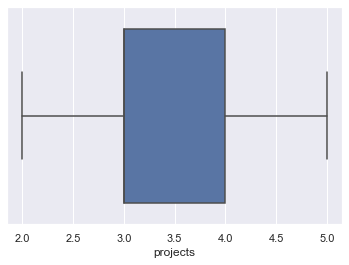

In [21]:
sns.boxplot( x=X_train["projects"] );
plt.show()

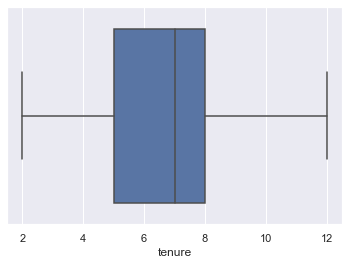

In [22]:
sns.boxplot( x=X_train["tenure"] );
plt.show()

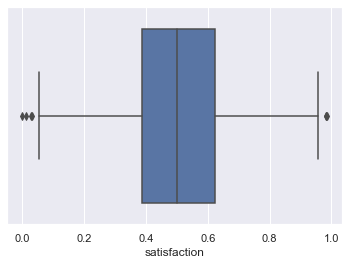

In [23]:
sns.boxplot( x=X_train["satisfaction"] );
plt.show()

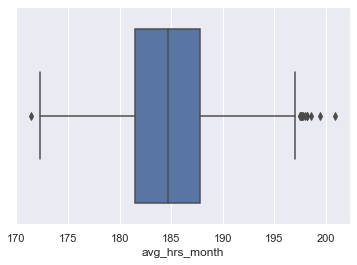

In [24]:
sns.boxplot( x=X_train["avg_hrs_month"] );
plt.show()

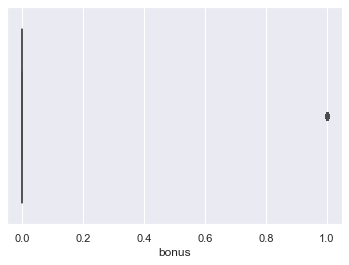

In [25]:
sns.boxplot( x=X_train["bonus"] );
plt.show()

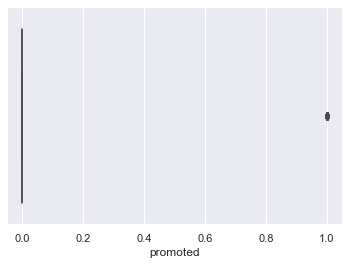

In [26]:
sns.boxplot( x=X_train["promoted"] );
plt.show()

## Creating Dummy Variables

In [27]:
print(X_train.shape)
X_train = pd.get_dummies(X_train, columns = ['department', 'salary'], drop_first = True)

(7632, 9)


In [28]:
print(X_train.shape)

(7632, 18)


In [29]:
X_train.head()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,salary_low,salary_medium
6870,0,0.698283,3,10.0,0.561656,0,195.494929,0,0,0,0,0,0,1,0,0,0,1
8889,0,0.487040,3,7.0,0.730389,0,185.707273,0,0,0,0,0,1,0,0,0,0,1
7058,0,0.572762,3,8.0,0.351720,0,189.038025,0,0,0,0,1,0,0,0,0,0,1
8858,0,0.699904,3,8.0,0.458049,0,188.925475,0,0,0,0,0,0,0,0,1,0,1
8014,0,0.659192,5,9.0,0.479336,0,191.496478,0,0,0,0,0,1,0,0,0,1,0


#### Different ways to encode but I don't follow it too much:
https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

## Standardizing relevant features: 

normally I would just use the following code:
X_train[features] = pd.DataFrame(scaler.fit_transform(X_train[features]))
to change the respective df columns to standardized versions with their name  intact but because I may want to create additional features later from the original data, I first created a separate df with the features scaled, then changed the names on the columns with a suffix 'scaled' and then concat these onto the original df and then dropped the original columns.

I only chose 'projects' 'tenure' and 'avg_hrs_month' to standardize because the rest of the columns that were not categorical
were already between 0 and 1 like 'review' and 'satisfaction'

The other ones like 'promoted' and 'bonus' already came in a categorical format even though they are integers i.e. 0 or 1

In [30]:
scaler = MinMaxScaler()

features = ['projects', 'tenure', 'avg_hrs_month']
features_scaled = pd.DataFrame(scaler.fit_transform(X_train[features])) #created a new df with just these 3 scaled features

In [31]:
features_scaled.head(3)

,0,1,2
0,0.333333,0.8,0.818001
1,0.333333,0.5,0.486076
2,0.333333,0.6,0.599030


In [32]:
features_scaled.columns = ['projects_scaled','tenure_scaled','avg_hrs_month_scaled'] # to change the names of the columns instead of 0 1 and 2

In [33]:
features_scaled.shape

(7632, 3)

In [34]:
features_scaled.head(3)

,projects_scaled,tenure_scaled,avg_hrs_month_scaled
0,0.333333,0.8,0.818001
1,0.333333,0.5,0.486076
2,0.333333,0.6,0.599030


In [35]:
features_scaled.tail(3)

,projects_scaled,tenure_scaled,avg_hrs_month_scaled
7629,0.000000,0.5,0.525144
7630,0.666667,0.3,0.315198
7631,0.333333,0.5,0.453781


In [36]:
features_scaled.shape

(7632, 3)

In [37]:
features_scaled.isnull().sum()

projects_scaled         0
tenure_scaled           0
avg_hrs_month_scaled    0
dtype: int64

In [38]:
X_train.shape

(7632, 18)

In [39]:
X_train.reset_index(drop=True, inplace=True)

### Resetting the index
I reset the index for X_train to start from 0 because I was getting some bullshit NaN values when I tried concatenating the two dataframes togther using the index from X_train. So to avoid he whole mess I just reset the index for X_train and I will have to do it for y_train as well.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

In [40]:
X_train = pd.concat([X_train, features_scaled.reindex(X_train.index)],axis = 1) # Concatenating the scaled features and original df

# If I did not include the .reindex(X_train.index) I was getting a resulting shape of X_train to be(9195, 21)
# this was because the index on X-train and features_scaled are in different order. we can see from before the first 
# instance of X_train has an idex of 6870 but features_scaled first index is 0. Thus when you concatenate just so
# without changing the index of features_scaled to that of X_train whatever rows indexes are not present in features_scaled would 
# then be included at the bottom and thus the longer resulting df with 9195 rows. Alternatively I could have just re-set the index
# of X_train to start from 0. If I am joining the X_train to the y-train to see the correlation matrix I would then have
# to reset the index of y_train too.

# I got df4.reindex(df1.index) from https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html 

In [41]:
X_train.head()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,salary_low,salary_medium,projects_scaled,tenure_scaled,avg_hrs_month_scaled
0,0,0.698283,3,10.0,0.561656,0,195.494929,0,0,0,0,0,0,1,0,0,0,1,0.333333,0.8,0.818001
1,0,0.487040,3,7.0,0.730389,0,185.707273,0,0,0,0,0,1,0,0,0,0,1,0.333333,0.5,0.486076
2,0,0.572762,3,8.0,0.351720,0,189.038025,0,0,0,0,1,0,0,0,0,0,1,0.333333,0.6,0.599030
3,0,0.699904,3,8.0,0.458049,0,188.925475,0,0,0,0,0,0,0,0,1,0,1,0.333333,0.6,0.595213
4,0,0.659192,5,9.0,0.479336,0,191.496478,0,0,0,0,0,1,0,0,0,1,0,1.000000,0.7,0.682403


In [42]:
X_train.shape

(7632, 21)

In [43]:
# Dropping original not scaled columns
X_train.drop(['projects', 'tenure', 'avg_hrs_month'], axis = 1, inplace = True) 

In [44]:
X_train.head()

,promoted,review,satisfaction,bonus,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,salary_low,salary_medium,projects_scaled,tenure_scaled,avg_hrs_month_scaled
0,0,0.698283,0.561656,0,0,0,0,0,0,0,1,0,0,0,1,0.333333,0.8,0.818001
1,0,0.487040,0.730389,0,0,0,0,0,0,1,0,0,0,0,1,0.333333,0.5,0.486076
2,0,0.572762,0.351720,0,0,0,0,0,1,0,0,0,0,0,1,0.333333,0.6,0.599030
3,0,0.699904,0.458049,0,0,0,0,0,0,0,0,0,1,0,1,0.333333,0.6,0.595213
4,0,0.659192,0.479336,0,0,0,0,0,0,1,0,0,0,1,0,1.000000,0.7,0.682403


In [45]:
X_train.shape

(7632, 18)

In [46]:
X_train.dtypes

# ok this shows that all of the features are numeric
# apparently when both dfs were concatenated it converted all of the features to floats

promoted                    int64
review                    float64
satisfaction              float64
bonus                       int64
department_admin            uint8
department_engineering      uint8
department_finance          uint8
department_logistics        uint8
department_marketing        uint8
department_operations       uint8
department_retail           uint8
department_sales            uint8
department_support          uint8
salary_low                  uint8
salary_medium               uint8
projects_scaled           float64
tenure_scaled             float64
avg_hrs_month_scaled      float64
dtype: object

### Experimenting with pandas concat

https://pandas.pydata.org/docs/reference/api/pandas.concat.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [47]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])

df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])

In [48]:
df1

,letter,number
0,a,1
1,b,2


In [49]:
df2

,letter,number
0,c,3
1,d,4


In [50]:
pd.concat([df1, df2],ignore_index=True)

,letter,number
0,a,1
1,b,2
2,c,3
3,d,4


In [51]:
pd.concat([df1, df2],axis = 1)

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


In [52]:
pd.concat([df1, df2.reindex(df1.index)],axis = 1)

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


##  Correlation Matrices

https://datatofish.com/correlation-matrix-pandas/

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

In [53]:
# X_train_continuous =  X_train[['review', 'projects', 'tenure', 'satisfaction' ]] 
# income_subset = X_train[['ApplicantIncome', 'CoapplicantIncome']] 

In [54]:
X_train.dtypes

promoted                    int64
review                    float64
satisfaction              float64
bonus                       int64
department_admin            uint8
department_engineering      uint8
department_finance          uint8
department_logistics        uint8
department_marketing        uint8
department_operations       uint8
department_retail           uint8
department_sales            uint8
department_support          uint8
salary_low                  uint8
salary_medium               uint8
projects_scaled           float64
tenure_scaled             float64
avg_hrs_month_scaled      float64
dtype: object

In [55]:
y_train.head() # just checking to see that y_train has the same indexes as X_train so when I join them up 
            # to create the correlation plot it makes sense.

,left
6870,0
8889,1
7058,0
8858,1
8014,0


In [56]:
y_train.reset_index(drop=True, inplace=True)

In [57]:
y_train.head()

,left
0,0
1,1
2,0
3,1
4,0


<AxesSubplot:>

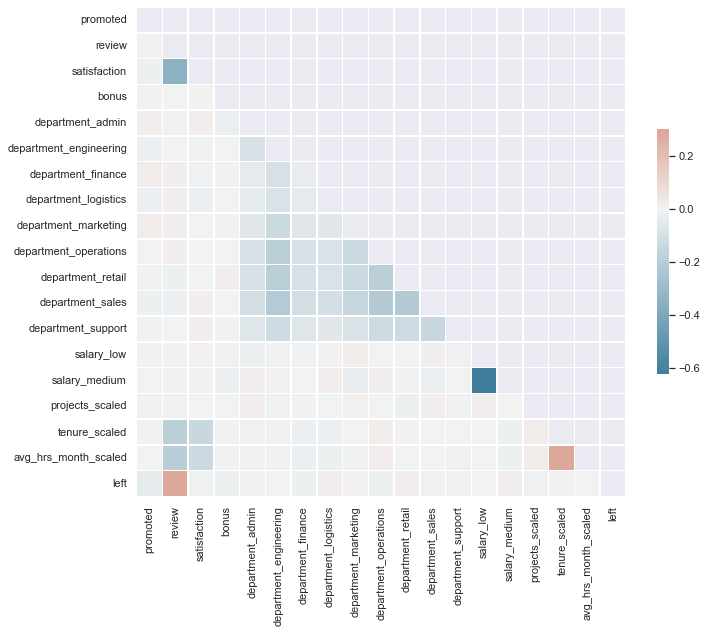

In [58]:
d = pd.concat([X_train, y_train],axis = 1) # Concatenating the X_train and target variable to see which features if any 
                                                   # are correlated with it
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### So from this correlation plot (ok I know I am not supposed to get correlations between categorical and continuous variables
#### like this but I just did it) we can see that review has a big negative impact on if a person left or not

## Using SMOTE for imbalanced dataset 

I googled "how to use smote python": https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688
    
https://towardsdatascience.com/how-to-effortlessly-handle-class-imbalance-with-python-and-smote-9b715ca8e5a7   - In this article the guy SMOTED everything and then did the split. He is not supposed to do this. He was supposed to split first and then SMOTE ---> then train the model --> then test the model on the unsmoted data

In [59]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X_train, y_train)



In [60]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print(f'''Shape of X_train before SMOTE: {X_train.shape}
Shape of X_train after SMOTE: {X_train_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_train_sm.value_counts(normalize=True) * 100

Shape of X_train before SMOTE: (7632, 18)
Shape of X_train after SMOTE: (10746, 18)

Balance of positive and negative classes (%):


left
1       50.0
0       50.0
dtype: float64

## Modelling

### Converting X_test through same transformation pipeline:

In [61]:
print(X_test.shape)

(1908, 9)


In [62]:
X_test = pd.get_dummies(X_test, columns = ['department', 'salary'], drop_first = True)
features = ['projects', 'tenure', 'avg_hrs_month']
features_scaled = pd.DataFrame(scaler.transform(X_test[features])) # not fit but just transform
features_scaled.columns = ['projects_scaled','tenure_scaled','avg_hrs_month_scaled']
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([X_test, features_scaled.reindex(X_test.index)],axis = 1)
X_test.drop(['projects', 'tenure', 'avg_hrs_month'], axis = 1, inplace = True) 


In [63]:
print(X_test.shape)

(1908, 18)


## Logistic Regression

In [64]:
logr = LogisticRegression()

In [65]:
logr.fit(X_train, np.ravel(y_train))

LogisticRegression()

https://www.geeksforgeeks.org/numpy-ravel-python/

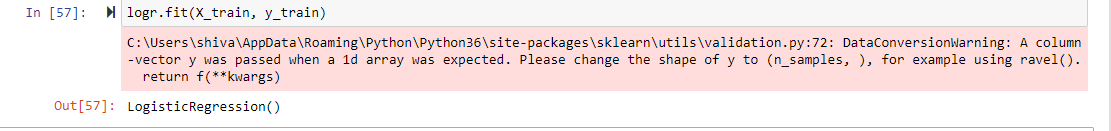

ValueError: Input contains NaN, infinity or a value too large for dtype('float64')

https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for

In [66]:
np.any(np.isnan(X_train))
np.all(np.isfinite(X_train))

True

In [67]:
#Check the training score:
logr.score(X_train, y_train) # this just checks the score (this is the Accuracy value)

0.7320492662473794

In [68]:
#Check the test score:
logr.score(X_test, np.ravel(y_test)) # this just checks the score (this is the Accuracy value)

0.7458071278825996

## Logistic Regression with SMOTE

In [69]:
logr.fit(X_train_sm, np.ravel(y_train_sm))

LogisticRegression()

In [70]:
#Check the training score:
logr.score(X_train_sm, y_train_sm) # this just checks the score (this is the Accuracy value)

0.673180718406849

In [71]:
#Check the test score:
logr.score(X_test, y_test) # this just checks the score (this is the Accuracy value)

0.6719077568134172

In [72]:
print("Model weights: %s"%(logr.coef_)) # these are weights
print("Model intercept: %s"%(logr.intercept_)) # this is the bias term
data = {'features': X_train_sm.columns, 'coefficients':logr.coef_[0]}
pd.DataFrame(data)
pd.DataFrame(data).sort_values(by=['coefficients'], axis=0, ascending=False)

Model weights: [[-0.98747811 10.82010969  2.40503956 -0.09211832 -0.11090359 -0.12437465
  -0.23023401 -0.06918304 -0.09310189 -0.26684576 -0.06130565 -0.11334351
  -0.14943777  0.04933592  0.11288974 -0.12416778  0.22368266  1.96970787]]
Model intercept: [-9.26058536]


,features,coefficients
1,review,10.820110
2,satisfaction,2.405040
17,avg_hrs_month_scaled,1.969708
16,tenure_scaled,0.223683
14,salary_medium,0.112890
13,salary_low,0.049336
10,department_retail,-0.061306
7,department_logistics,-0.069183
3,bonus,-0.092118
8,department_marketing,-0.093102


## Random Forest Classifier

I was wondering how that SMOTE guy (https://towardsdatascience.com/how-to-effortlessly-handle-class-imbalance-with-python-and-smote-9b715ca8e5a7) (link pasted in SMOTE section above too) knew how to use the sklearn.metrics accuracy score and recall score, when I just googled "sklearn metrics":
https://scikit-learn.org/stable/modules/model_evaluation.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

The best metric to use in this case would be the F1 score as you would want a balance between precision and recall as it is simalar to cancer:

https://towardsdatascience.com/precision-recall-and-predicting-cervical-cancer-with-machine-learning-367221e70538#:~:text=Precision%20represents%20the%20proportion%20of,that%20the%20model%20accurately%20predicted.

In [73]:
precision_score

NameError: name 'precision_score' is not defined

#### I am getting that error above " NameError: name 'precision_score' is not defined " because I did not import precision_score  under sklearn.metrics

Accuracy = 0.867
Recall = 0.682
F1 Score = 0.739



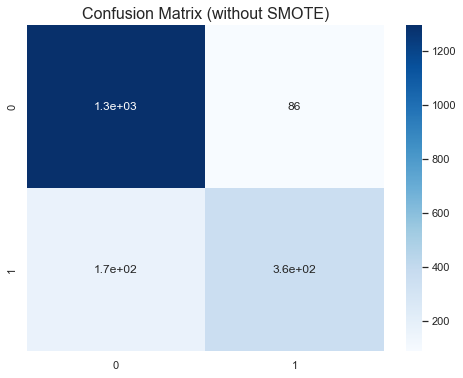

In [77]:
# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, np.ravel(y_train))
preds = model.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.3f}\nRecall = {recall_score(y_test, preds):.3f}\nF1 Score = {f1_score(y_test, preds):.3f}\n')
# I added in F1 score
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

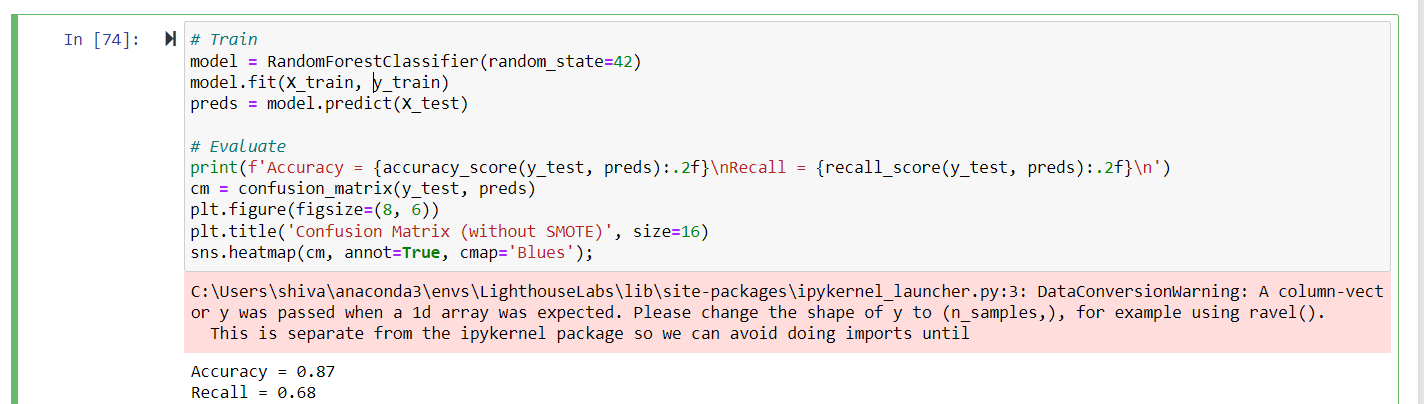

## Random Forest Classifier with SMOTE

Accuracy = 0.852
Recall = 0.766
F1 Score = 0.740



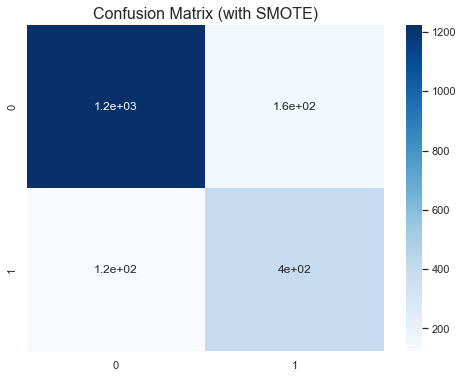

In [80]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_sm, np.ravel(y_train_sm))
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.3f}\nRecall = {recall_score(y_test, preds):.3f}\nF1 Score = {f1_score(y_test, preds):.3f}\n')
# I added in F1 score
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

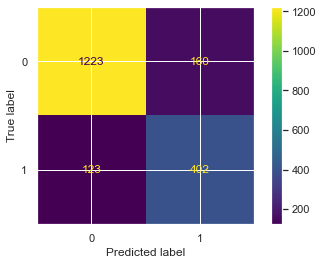

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

I googled: "sklearn metrics confusion_matrix" as I was unsure if True (Actual) were the rows and the Predicted was the Columns.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

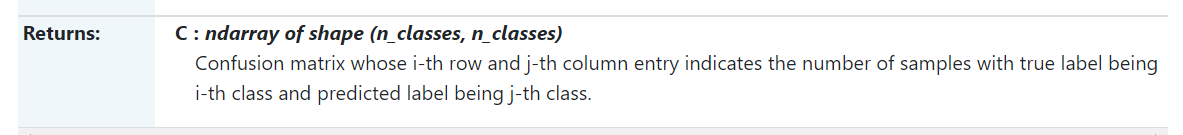

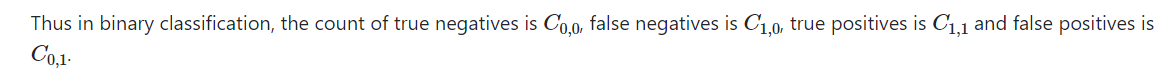



https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/#:~:text=A%20confusion%20matrix%20is%20a,the%20true%20values%20are%20known.&text=The%20classifier%20made%20a%20total,the%20presence%20of%20that%20disease).

Accuracy: Overall, how often is the classifier correct?
(TP+TN)/total = (402+1223)/1908 = 0.852

Okay good so the Accuracy checks out!

True Positive Rate: When it's actually yes, how often does it predict yes?
Actual Yes = 123 + 402 = 525
TP/actual yes = 402/525 = 0.766
also known as "Sensitivity" or "Recall"

Okay good so the Recall checks out!

Precision = TP/predicted yes = 402/(160 + 402) = 0.91

In [84]:
(402+1223)/1908

0.8516771488469602

In [83]:
402/525

0.7657142857142857

In [82]:
402/(160 + 402)

0.7153024911032029

In [85]:
model.base_estimator_

DecisionTreeClassifier()

### Feature Importance from RandomForestClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Plotting the feature importances

https://mljar.com/blog/feature-importance-in-random-forest/

#### Other feature importance link: didn't really use it but it has some useful shit

https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b

In [86]:
model.feature_importances_

array([0.00420913, 0.25108837, 0.24270479, 0.01041111, 0.00371967,
       0.00728219, 0.00422219, 0.00396837, 0.00537581, 0.00698832,
       0.00751751, 0.00820515, 0.00531105, 0.00730655, 0.01065417,
       0.02382852, 0.13989034, 0.25731676])

In [87]:
model.n_features_in_

18

In [92]:
import sklearn
sklearn_version = sklearn.__version__

print(sklearn_version)

0.23.2


You see that is why the feature names shit I was trying to do below was not working

In [88]:
model.feature_names_in_

AttributeError: 'RandomForestClassifier' object has no attribute 'feature_names_in_'

In [89]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(model.feature_names[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

AttributeError: 'RandomForestClassifier' object has no attribute 'feature_names'

To get the below:
https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances

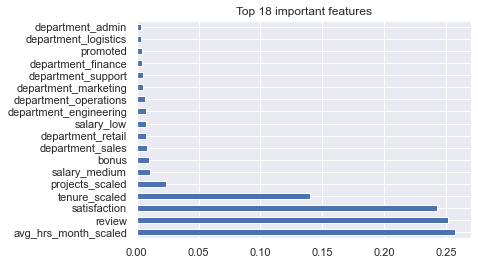

In [90]:
feat_importances = pd.Series(model.feature_importances_, index=X_train_sm.columns) # this is just making a pandas series of the feature importances values and their respective names.
feat_importances.nlargest(18).plot(kind='barh')
plt.title("Top 18 important features")
plt.show()

My question is how do you tell if a high or low value of the most important features affects the outcome of the model?

What Mitch said here is that you can't unless like you use just that one feature ( where I assume you would be able to 
get the coefficient). But in this case you would not be able to say if a high value of review would lead to a 0 or a 1 being predicted. Because in this scenario you would intuitevly know that hey a low satisfaction score would lead to an employee leaving but in other cases like in some medical thing if there is a gene x as a feature, it would be way more difficult to say if a high or low value of that feature would impact the classification in a particular manner.

All he said that is good enough if you are presenting to a manager or something is to explain to them that those 3 variables are great predictors or have the highest importance when it comes to predicting if an employeee will churn or not.

do a clustering to see if I can get any clusters